# Train LSTM : MobileNet

* 21XXXX_01_... .ipynb ~ 21XXXX_03_... .ipynb 다음에 이어지는 코드입니다.
* MobileNet를 통과해 추출한 프레임별 특성 넘파이 배열을 투입하여, LSTM 모델을 훈련시킵니다.
* 훈련된 모델은 .h5 확장자의 파일로 저장합니다.

# Import

In [1]:
import numpy as np # numpy 배열
import os # 파일 및 폴더의 경로 지정을 위한 모듈
import tensorflow as tf # 텐서플로우
from tensorflow import keras # 케라스
import time #프로세스 소요시간 표시 목적
import matplotlib.pyplot as plt

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7016598972982481879
]


# VGG19, predict, reshape를 거쳐 생성된 비디오 데이터셋과 레이블 불러오기


In [3]:
X_train_reshaped=np.load('D:/datasets/AllVideo_numpy_list_pickle/MobileNet_x_train_reshaped.npy')
#> (2865, 30, 25600) ndarray

In [4]:
X_test_reshaped=np.load('D:/datasets/AllVideo_numpy_list_pickle/MobileNet_x_test_reshaped.npy')
#> (717, 30, 25600) ndarray

In [5]:
y_train=np.load('D:/datasets/AllVideo_numpy_list_pickle/02_label_training_Numpy_210507.npy')
#> (2865, 2) ndarray (동영상 개수, 2)

In [6]:
y_test=np.load('D:/datasets/AllVideo_numpy_list_pickle/02_label_test_Numpy_210507.npy')
#> (717, 2) ndarray (동영상 개수, 2)

In [7]:
X_train_reshaped.shape, X_test_reshaped.shape #> (동영상 개수, 프레임 개수, 25600)

((2865, 30, 25600), (717, 30, 25600))

In [8]:
y_train.shape, y_test.shape

((2865, 2), (717, 2))

In [9]:
y_train[10:30]

array([[0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]])

# LSTM 모델 구축
* MobileNet를 거쳐 만들어진 배열과 크기를 맞춰야 함에 유의합니다.
* **`n_chunks`** : 초당 프레임 수와 같습니다. 즉, 30입니다.

In [21]:
chunk_size=25600
n_chunks=30
rnn_size=512

model=keras.models.Sequential()
model.add(keras.layers.LSTM(rnn_size, input_shape=(n_chunks, chunk_size))) # (30, 25600)
model.add(keras.layers.Dense(1024))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dense(256))
model.add(keras.layers.Activation('sigmoid'))
model.add(keras.layers.Dense(2))
model.add(keras.layers.Activation('softmax'))

In [22]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 512)               53479424  
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
activation_3 (Activation)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               262400    
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 514       
_________________________________________________________________
activation_5 (Activation)    (None, 2)                

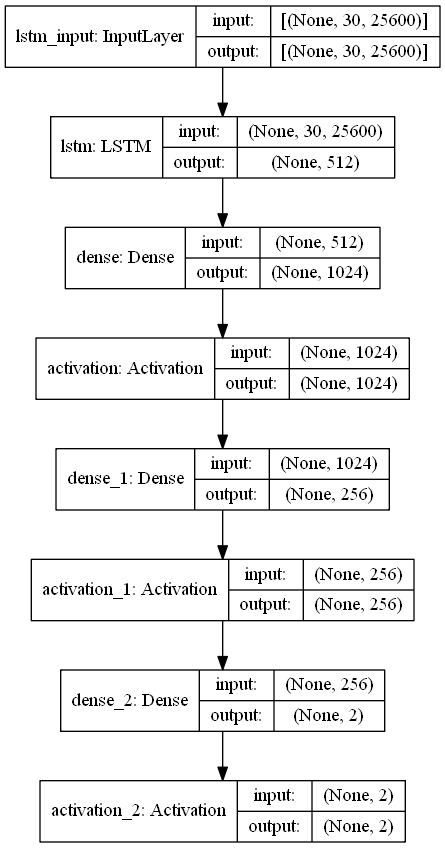

In [13]:
keras.utils.plot_model(model, show_shapes=True)

# 콜백 정의

In [24]:
checkpoint_cb=keras.callbacks.ModelCheckpoint('210508_vc_MobileNet_checkpoint_epoch100.h5', save_best_only=True)

# 모델 훈련

In [25]:
np.random.seed(42)

In [26]:
epoch=100
batchS=500
history=model.fit(x=X_train_reshaped[0:2100], y=y_train[0:2100],
                  epochs=epoch,
                  validation_data=(X_train_reshaped[2100:], y_train[2100:]),
                  callbacks=[checkpoint_cb],
                  batch_size=batchS, verbose=2)

Epoch 1/100
5/5 - 84s - loss: 0.3309 - accuracy: 0.4800 - val_loss: 0.2234 - val_accuracy: 0.6471
Epoch 2/100
5/5 - 55s - loss: 0.2091 - accuracy: 0.7152 - val_loss: 0.1779 - val_accuracy: 0.7477
Epoch 3/100
5/5 - 55s - loss: 0.1614 - accuracy: 0.7676 - val_loss: 0.1522 - val_accuracy: 0.7922
Epoch 4/100
5/5 - 57s - loss: 0.1374 - accuracy: 0.8043 - val_loss: 0.1440 - val_accuracy: 0.8092
Epoch 5/100
5/5 - 55s - loss: 0.1046 - accuracy: 0.8586 - val_loss: 0.1367 - val_accuracy: 0.8131
Epoch 6/100
5/5 - 61s - loss: 0.0731 - accuracy: 0.9162 - val_loss: 0.1448 - val_accuracy: 0.8026
Epoch 7/100
5/5 - 57s - loss: 0.0507 - accuracy: 0.9452 - val_loss: 0.1250 - val_accuracy: 0.8288
Epoch 8/100
5/5 - 58s - loss: 0.0323 - accuracy: 0.9638 - val_loss: 0.1341 - val_accuracy: 0.8196
Epoch 9/100
5/5 - 56s - loss: 0.0224 - accuracy: 0.9762 - val_loss: 0.1331 - val_accuracy: 0.8183
Epoch 10/100
5/5 - 57s - loss: 0.0140 - accuracy: 0.9876 - val_loss: 0.1363 - val_accuracy: 0.8144
Epoch 11/100
5/5 - 

# 모델 테스트

In [27]:
result=model.evaluate(X_test_reshaped, y_test)

23/23 [==============================] - 21s 872ms/step - loss: 0.1539 - accuracy: 0.8159


 # 모델 정확도, 손실률 출력

In [28]:
for name, value in zip(model.metrics_names, result):
    print(name, value)

loss 0.15388557314872742
accuracy 0.8158996105194092


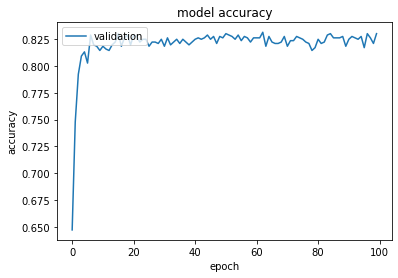

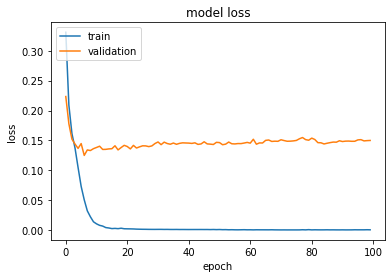

In [29]:
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['validation'], loc='upper left')
plt.savefig('210508_MobileNet_model_accuracy_epoch100.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('210508_MobileNet_model_loss_epoch100.png')
plt.show()

# 모델 저장
* 여기서 저장한 모델(가중치 포함)을 다른 파일에서 불러올 수 있게 됩니다.

In [30]:
model.save('210508_vc_MobileNet_model_epoch100.h5', include_optimizer=True)